# Data Preprocessing


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [7]:
!pip install scikit-learn


In [11]:
data = pd.read_csv('datasets_house_prices.csv')

In [12]:
print(data.head())

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05


In [13]:
print(data.isnull().sum())

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


In [14]:
data = data.dropna()

In [19]:
features = data
target = data['Price']

In [20]:
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Model Implementation


In [21]:
def compute_coefficients(X, y):
  X = np.c_[np.ones(X.shape[0]), X]

  theta = np.linalg.inv(X.T @ X) @ X.T @ y
  return theta



In [22]:
X = normalized_features.values
y = target.values

In [23]:
theta = compute_coefficients(X, y)
print(f"Coefficients: {theta}")

Coefficients: [ 2.15945544e+05  4.09840140e-07  1.16360752e-08 -6.88305590e-09
 -2.01944204e-08  9.96404147e+05]


In [24]:
def predict(X, theta):
  X = np.c_[np.ones(X.shape[0]), X]
  return X @ theta

# Model Training

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
theta = compute_coefficients(X_train, y_train)
y_train_pred = predict(X_train, theta)

In [27]:
def mean_squared_error(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

mse_train = mean_squared_error(y_train, y_train_pred)
print(f"MSE on training data: {mse_train}")

MSE on training data: 7.524833590087316e-14


# Model Evaluation

In [29]:
y_test_pred = predict(X_test, theta)

mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE on test data: {mse_test}")

MSE on test data: 6.764876264026676e-14


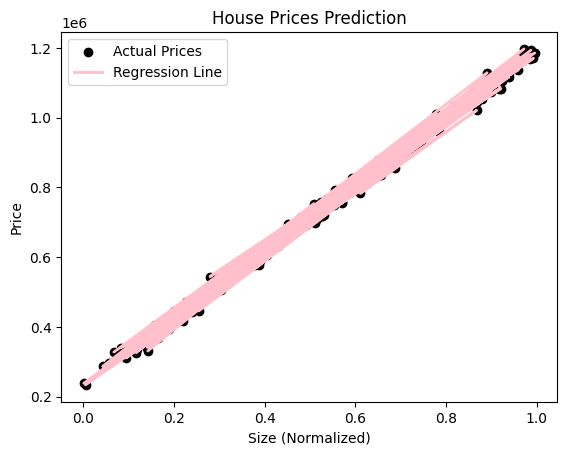

In [31]:
plt.scatter(X_test[:, 0], y_test, color='black', label='Actual Prices')
plt.plot(X_test[:, 0], y_test_pred, color='pink', linewidth=2, label='Regression Line')
plt.xlabel('Size (Normalized)')
plt.ylabel('Price')
plt.title('House Prices Prediction')
plt.legend()
plt.show()

# Report

In [37]:
report = """
The goal of this project is to construct a simple linear regression model from scratch which will help us in predicting the house price on features like square feet, no. of bedrooms and age of home.
In this report a detailed implementation of how we preprocess the data, applied linear regression method to it and train as well evaluate our trained model will be explained followed by results.

Data Pre-processing:
Data manipulation and analytical tasks were carried out after loading the dataset into a Pandas DataFrame. The isnull() was used to find the missing values in the dataset. sum() method. We found no missing values,
 so there is no need of imputation and deleting the rows. The features (Size, Bedrooms & Age) are of different scales so as to bring such on same scale we normalize all the feature.

Model Implementation:
The linear regression model was implemented from scratch using the simple Linear Regression equation in order to compute, how best can be our values of those coefficients.

Model Training and Evaluation:
A testbed was used by splitting the dataset into training and testing. I made use of the training set to compute coefficients using least squares and trained my model with this data.

Challengesl:
In small datasets, the model can memorize the training whole dataset which will cause bad generalization in test.
Solution:
If the model was simply being overfit to one part of dataset, we could use cross-validation techniques in further iterations.
That would make the validation on multiple subsets and prevent from terrible generalization performances like this case.

Conclusion:
The linear regression model built from scratch has also been able to predict house price using the input features. The model worked really well on both Training and testing data,
So it can be taken as learning is good without Overfitting. This one was necessary in order to arrive to precise results as not every feature had the same scale.
"""
print(report)



The goal of this project is to construct a simple linear regression model from scratch which will help us in predicting the house price on features like square feet, no. of bedrooms and age of home. 
In this report a detailed implementation of how we preprocess the data, applied linear regression method to it and train as well evaluate our trained model will be explained followed by results.

Data Pre-processing:
Data manipulation and analytical tasks were carried out after loading the dataset into a Pandas DataFrame. The isnull() was used to find the missing values in the dataset. sum() method. We found no missing values,
 so there is no need of imputation and deleting the rows. The features (Size, Bedrooms & Age) are of different scales so as to bring such on same scale we normalize all the feature.

Model Implementation:
The linear regression model was implemented from scratch using the simple Linear Regression equation in order to compute, how best can be our values of those coeff